** Recap - what was covered in chapter 3 Linear Regression? ** 


- Simple Linear Regression  
- Multiple Linear Regression  
- Important questions (are the predictors useful in predicting the outcome? How well does the model fit the data?)
- Extentions of the Linear model (transforming non-linear data sets)  
- Potential problems ( non-linearity, outliers, collinearity) 
- Comparison of Linear regression with K-Nearest Neighbors (non-parametric) 

## Lab:Linear Regression 
Chapter 3.6, pg 109  
 
  

In [73]:
from sklearn.datasets import load_boston
boston = load_boston()

print(boston.data.shape)
# bostondf = pd.DataFrame(boston.data, columns=boston.feature_names) #converting to dataframe
print(boston.DESCR)

(506, 13)
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by t

In [49]:
import pandas as pd 
import numpy as np 
import seaborn as sns 

%matplotlib inline 

In [3]:
## importing directly from url to include the field MEDV (median house value) which doesnt seem 
## to exist in load_boston command above
bostondf = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", 
                       sep ='\s+', ## this is used because there are multiple spaces used as a delimiter
                       header = None)

In [11]:
names = boston.feature_names.tolist()
names.append('MEDV') 
names
bostondf.columns = names 
bostondf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


** Checking how the outcome "MEDV" is distibuted ** 

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

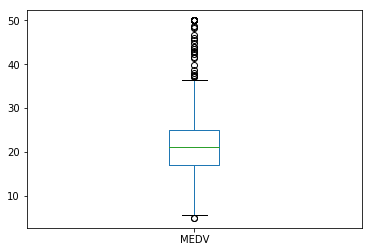

In [13]:
bostondf['MEDV'].plot(kind = 'box') 
bostondf['MEDV'].describe()

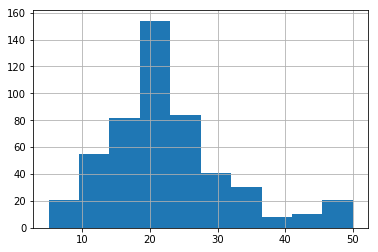

In [97]:
bostondf['MEDV'].hist()

### 1) Fit a simple linear regression, medv as the outcome and lstat as the predictor...  
    Predicting MEDV using LSTAT (% lower status of the popn) 

In [12]:
import statsmodels.formula.api as smf #"formula notation" (similar to R)
lm = smf.ols(formula='MEDV ~ LSTAT', data=bostondf).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 27 Jun 2017   Prob (F-statistic):           5.08e-88
Time:                        10:15:57   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000        33.448    35.659
LSTAT         -0.9500      0.039    -24.528      0.000        -1.026    -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Lstat is significant and explains 54% of MEDV.  The plot of residuals below shows a reasonable amount of error, and quite a wide distribution with a std dev of 6.2 - the std dev of MEDV itself is only 9.  
The coefficient tells me that for each unit change in LSTAT there is a negative effect on MEDV by -0.95 - i.e. the more lower status residents the lower the median house price.

mean 2.9804880566221595e-15
std 6.209603137512004


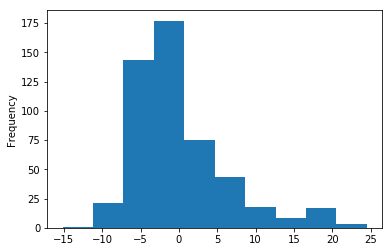

In [90]:
lm.resid.plot(kind='hist')
print('mean',lm.resid.mean()) 
print('std', lm.resid.std()) 

In [107]:
bostondf['LSTAT'].head()

0    4.98
1    9.14
2    4.03
3    2.94
4    5.33
Name: LSTAT, dtype: float64

** Adding prediction to data frame  ** 

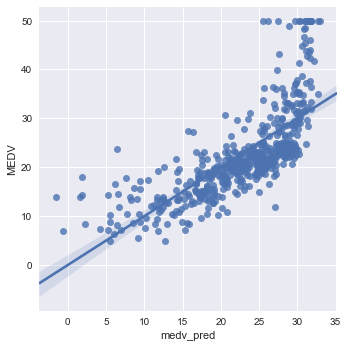

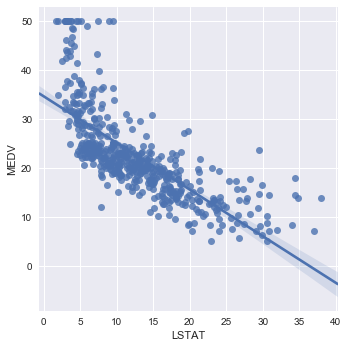

In [116]:
x_new = bostondf[['LSTAT']]
bostondf['medv_pred'] = lm.predict(x_new)

sns.lmplot('medv_pred', 'MEDV', bostondf)
sns.lmplot('LSTAT', 'MEDV', bostondf)


The first graph shows that the data set doesnt look very linear, as there are a number of obs at 50.  
The model doesnt make any predictions above 35.  
The second graph shows the negative correlation between LSTAT and MEDV.

### 2) Multiple Linear Regression 
Using LSTAT and AGE predictors


In [15]:
lm = smf.ols(formula='MEDV ~ LSTAT+ AGE', data=bostondf).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Tue, 27 Jun 2017   Prob (F-statistic):           2.98e-88
Time:                        10:17:06   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.000        31.787    34.659
LSTAT         -1.0321      0.048    -21.416      0.000        -1.127    -0.937
AGE            0.0345      0.012      2.826      0.005         0.011     0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

** Using all predictors to predict MEDV  ** 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 27 Jun 2017   Prob (F-statistic):          6.72e-135
Time:                        11:39:45   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000        26.432    46.487
X[0]          -0.1080      0.033     -3.287      0.001        -0.173    -0.043
X[1]           0.0464      0.014      3.382      0.001         0.019     0.073
X[2]           0.0206      0.061      0.334      0.738        -0.100     0.141
X[3]           2.6867      0.862      3.118      0.002         0.994     4.380
X[4]         -17.7666      3.820     -4.651      0.000       -25.272   -10.262
X[5]           3.8099      0.418      9.116      0.000         2.989     4.631
X[6]           0.0007      0.013      0.052      0.958        -0.025     0.027
X[7]          -1.4756      0.199     -7.398      0.000        -1.867    -1.084
X[8]           0.3060      0.066      4.613      0.000         0.176     0.436
X[9]          -0.0123      0.004     -3.280      0.001        -0.020    -0.005
X[10]         -0.9527      0.131     -7.283      0.000        -1.210    -0.696
X[11]          0.0093      0.003      3.467      0.001         0.004     0.015
X[12]         -0.5248      0.051    -10.347      0.000        -0.624    -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

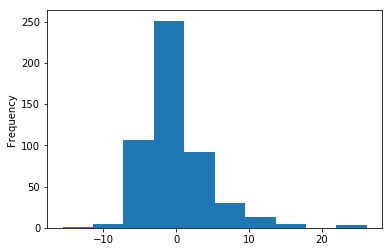

In [33]:
# lm = smf.ols(formula='MEDV ~ .', data=bostondf).fit() # this syntax should allow you to include all predictors but it doesn't

X = bostondf.ix[:,0:13]
lm = smf.ols(formula='MEDV ~ X', data=bostondf).fit()

lm.resid.plot(kind='hist')
lm.summary()

Using all predictors improves the r2 from 0.55 to 0.74.  
However some predictors don't pass the t-test (p values are too high), these are; INDUS and AGE.

In [ ]:
X = bostondf.ix[:,0:13]
X.drop(['AGE','INDUS'] ,inplace=True, axis=1)
X.head(1)

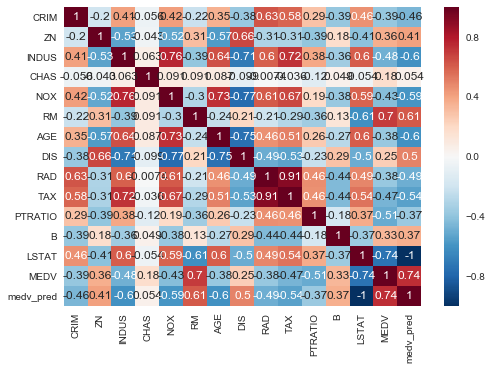

In [122]:
sns.heatmap(bostondf.corr(), annot=True)

** Interaction terms  **  
The syntax ** lstat:b** only includes lstat x b  
whilst the syntax ** lstat x b ** includes lstat x b + lstat + b

r2:  0.555726545099
coef:  Intercept    36.088536
LSTAT        -1.392117
AGE          -0.000721
LSTAT:AGE     0.004156
dtype: float64
p-value: Intercept    4.907116e-88
LSTAT        8.780730e-16
AGE          9.710878e-01
LSTAT:AGE    2.524911e-02
dtype: float64


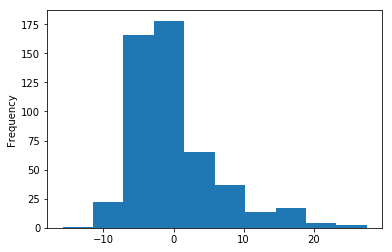

In [46]:
lm = smf.ols(formula='MEDV ~ LSTAT*AGE', data=bostondf).fit()
lm.resid.plot(kind='hist')
print('r2: ', lm.rsquared) 
print('coef: ', lm.params)
print ('p-value:', lm.pvalues)

** Non-linear transformations ** 

CRIM       -0.388305
ZN          0.360445
INDUS      -0.483725
CHAS        0.175260
NOX        -0.427321
RM          0.695360
AGE        -0.376955
DIS         0.249929
RAD        -0.381626
TAX        -0.468536
PTRATIO    -0.507787
B           0.333461
LSTAT      -0.737663
MEDV        1.000000
lstat2     -0.622179
lstatLog   -0.815442
Name: MEDV, dtype: float64

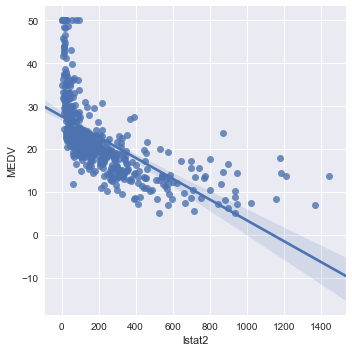

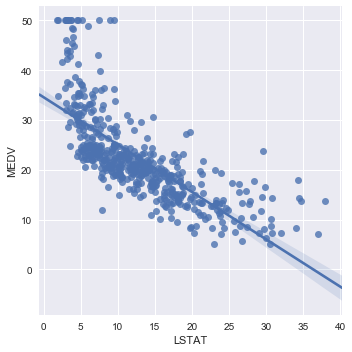

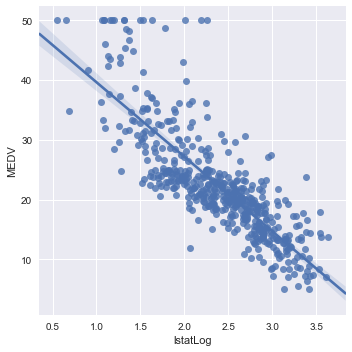

In [85]:
bostondf['lstat2'] =bostondf['LSTAT']**2
bostondf['lstatLog'] = np.log(bostondf.LSTAT) 

sns.lmplot('lstat2','MEDV', bostondf)
sns.lmplot('LSTAT', 'MEDV', bostondf)
sns.lmplot('lstatLog', 'MEDV', bostondf)
bostondf.corr().MEDV

Squaring LSTAT reduces the correlation, from -0.73 to -0.63.

In [86]:

lm1 = smf.ols(formula='MEDV ~ LSTAT**2', data=bostondf).fit()
# lm.resid.plot(kind='hist')
print('Squared')
print('r2: ', lm1.rsquared) 
print('coef: ', lm1.params)
# print (format(variable,'.65f')) 
print ('p-value:', lm1.pvalues) 

print('Logged')
lm2 = smf.ols(formula='MEDV ~ np.log(LSTAT)', data=bostondf).fit()
# lm.resid.plot(kind='hist')
print('Squared')
print('r2: ', lm2.rsquared) 
print('coef: ', lm2.params)
# print (format(variable,'.65f')) 
print ('p-value:', lm2.pvalues) 


Squared
r2:  0.544146297586
coef:  Intercept    34.553841
LSTAT        -0.950049
dtype: float64
p-value: Intercept    3.743081e-236
LSTAT         5.081103e-88
dtype: float64
Logged
Squared
r2:  0.664946224879
coef:  Intercept        52.124757
np.log(LSTAT)   -12.480972
dtype: float64
p-value: Intercept        1.017226e-211
np.log(LSTAT)    9.279886e-122
dtype: float64


Squaring consequently doesn't improve the models ability to predict MEDV, but the pvalue is now significant.  
Logging improves the R2 and the p-value.

** Qualitative predictors **  
Using Carseats data 

In [136]:
## IMPORT A DATASET THAT INCLUDES QUAL PREDICTORS
titanic = pd.read_csv("../titanic.csv")
titanic.Embarked.drop_duplicates()
# titanic.head()

0       S
1       C
5       Q
61    NaN
Name: Embarked, dtype: object

** Use this Formula notation dummy variables are automatically created for categorical variables:** 

In [134]:
lm = smf.ols(formula='Survived ~ Embarked', data=titanic).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     13.61
Date:                Tue, 27 Jun 2017   Prob (F-statistic):           1.51e-06
Time:                        14:07:06   Log-Likelihood:                -606.51
No. Observations:                 889   AIC:                             1219.
Df Residuals:                     886   BIC:                             1233.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         0.5536      0.037     14.964      0.000         0.481     0.626
Embarked[T.Q]    -0.1640      0.066     -2.485      0.013        -0.293    -0.034
Embarked[T.S]    -0.2166      0.042     -5.215      0.000        -0.298    -0.135
==============================================================================
Omnibus:                       31.025   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.479
Skew:                           0.477   Prob(JB):                     1.04e-29
Kurtosis:                       1.359   Cond. No.                         5.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model has created the variables EmbarkedQ and EmbarkedS - EmbarkedC isn't required as that would create the "dummy variable trap"